In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np
import random
from fbprophet import Prophet

Importing plotly failed. Interactive plots will not work.


In [28]:
df = pd.read_csv("avocado.csv")
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
2,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
3,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany
4,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27318,2015-11-22,1.97,6249.43,1733.40,2873.92,30.95,1611.16,1590.00,21.16,0.0,organic,2015,WestTexNewMexico
27319,2015-11-29,2.08,4638.10,1395.02,2238.04,61.71,943.33,943.33,0.00,0.0,organic,2015,WestTexNewMexico
27320,2015-12-13,1.80,7836.65,2194.49,2981.01,25.97,2635.18,2598.45,36.73,0.0,organic,2015,WestTexNewMexico
27321,2015-12-20,1.92,6255.19,1512.45,2407.32,11.78,2323.64,2213.72,109.92,0.0,organic,2015,WestTexNewMexico


In [29]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,27323.000000,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,2.732300e+04,27323.000000,27323.000000
mean,1.400632,9.135469e+05,2.953187e+05,2.901059e+05,2.215868e+04,3.058740e+05,2.186982e+05,8.202537e+04,5150.387571,2016.956593
std,0.385439,3.702672e+06,1.273010e+06,1.187227e+06,1.031329e+05,1.274851e+06,8.881292e+05,3.917356e+05,30719.207766,1.406539
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.110000,1.361412e+04,7.964250e+02,2.922980e+03,0.000000e+00,7.703605e+03,5.283050e+03,2.773700e+02,0.000000,2016.000000
50%,1.370000,1.198654e+05,1.003785e+04,2.568849e+04,1.926900e+02,4.775039e+04,3.223150e+04,4.312490e+03,0.000000,2017.000000
75%,1.640000,4.747205e+05,1.133179e+05,1.454464e+05,5.898300e+03,1.461021e+05,1.048424e+05,3.268494e+04,450.665000,2018.000000
max,3.250000,6.371614e+07,2.274362e+07,2.047057e+07,2.546439e+06,2.347299e+07,1.543625e+07,8.378356e+06,844929.830000,2019.000000


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27323 entries, 0 to 27322
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          27323 non-null  object 
 1   AveragePrice  27323 non-null  float64
 2   Total Volume  27323 non-null  float64
 3   4046          27323 non-null  float64
 4   4225          27323 non-null  float64
 5   4770          27323 non-null  float64
 6   Total Bags    27323 non-null  float64
 7   Small Bags    27323 non-null  float64
 8   Large Bags    27323 non-null  float64
 9   XLarge Bags   27323 non-null  float64
 10  type          27323 non-null  object 
 11  year          27323 non-null  int64  
 12  region        27323 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 2.7+ MB


In [31]:
df.isnull().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [32]:
df = df.sort_values("Date")

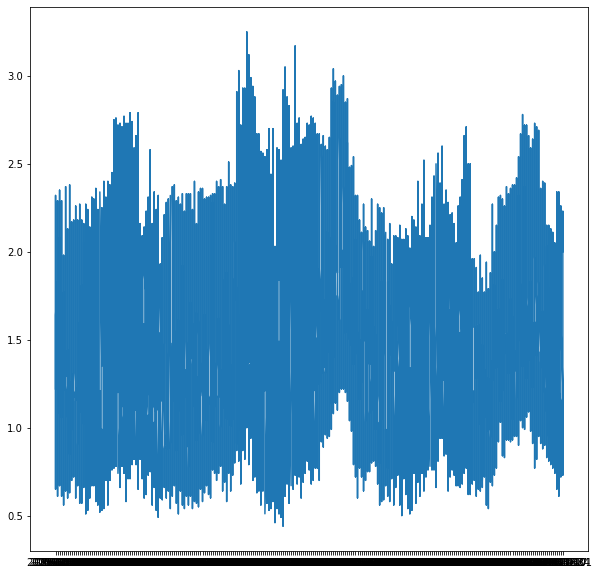

In [33]:
plt.figure(figsize=(10, 10))
plt.plot(df['Date'],df['AveragePrice'])

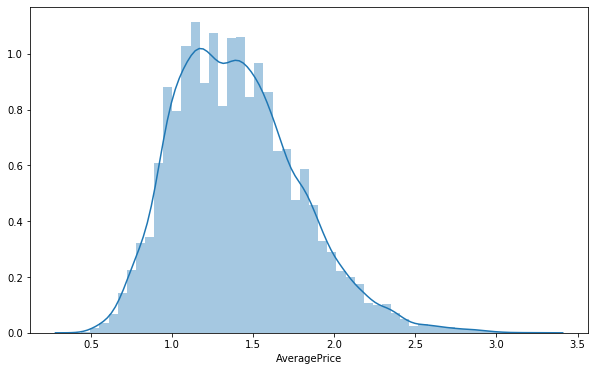

In [34]:
plt.figure(figsize=(10, 6))
sns.distplot(df['AveragePrice'])

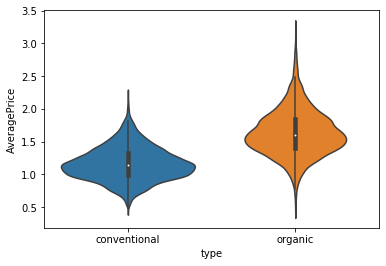

In [35]:
sns.violinplot(y='AveragePrice' , x='type', data=df)

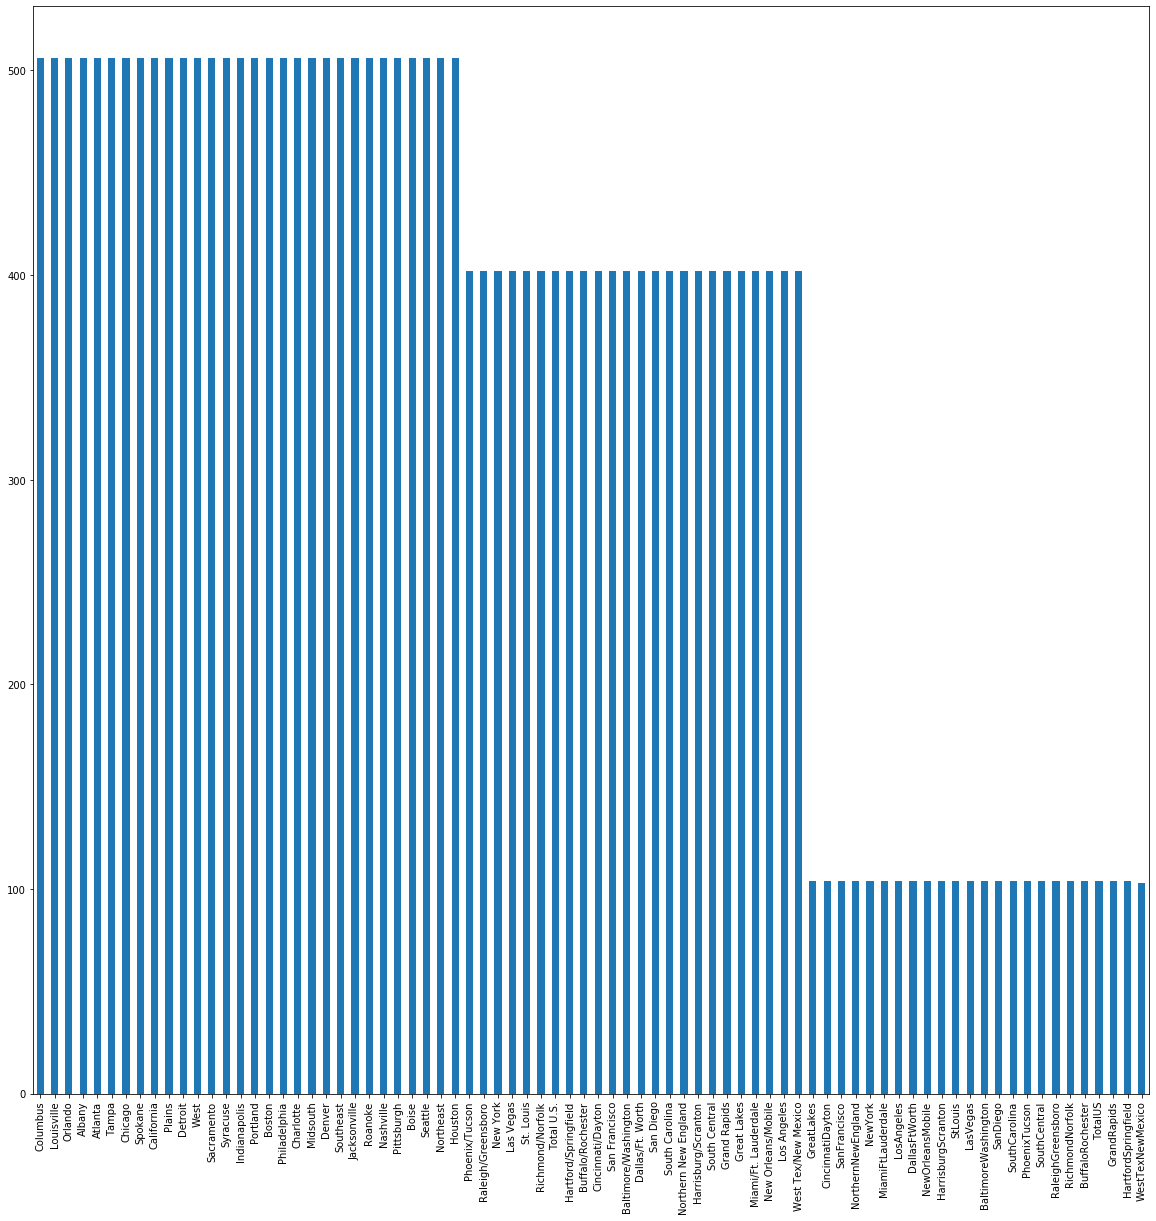

In [36]:
df['region'].value_counts().plot.bar(figsize=(20, 20))

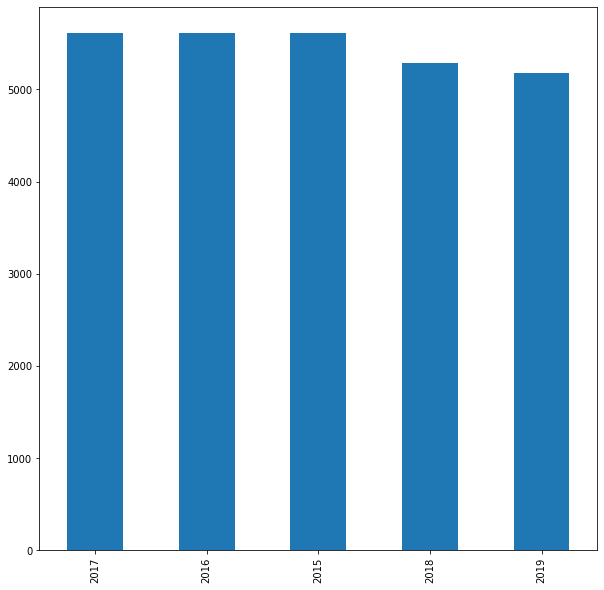

In [37]:
df['year'].value_counts().plot.bar(figsize=(10, 10))

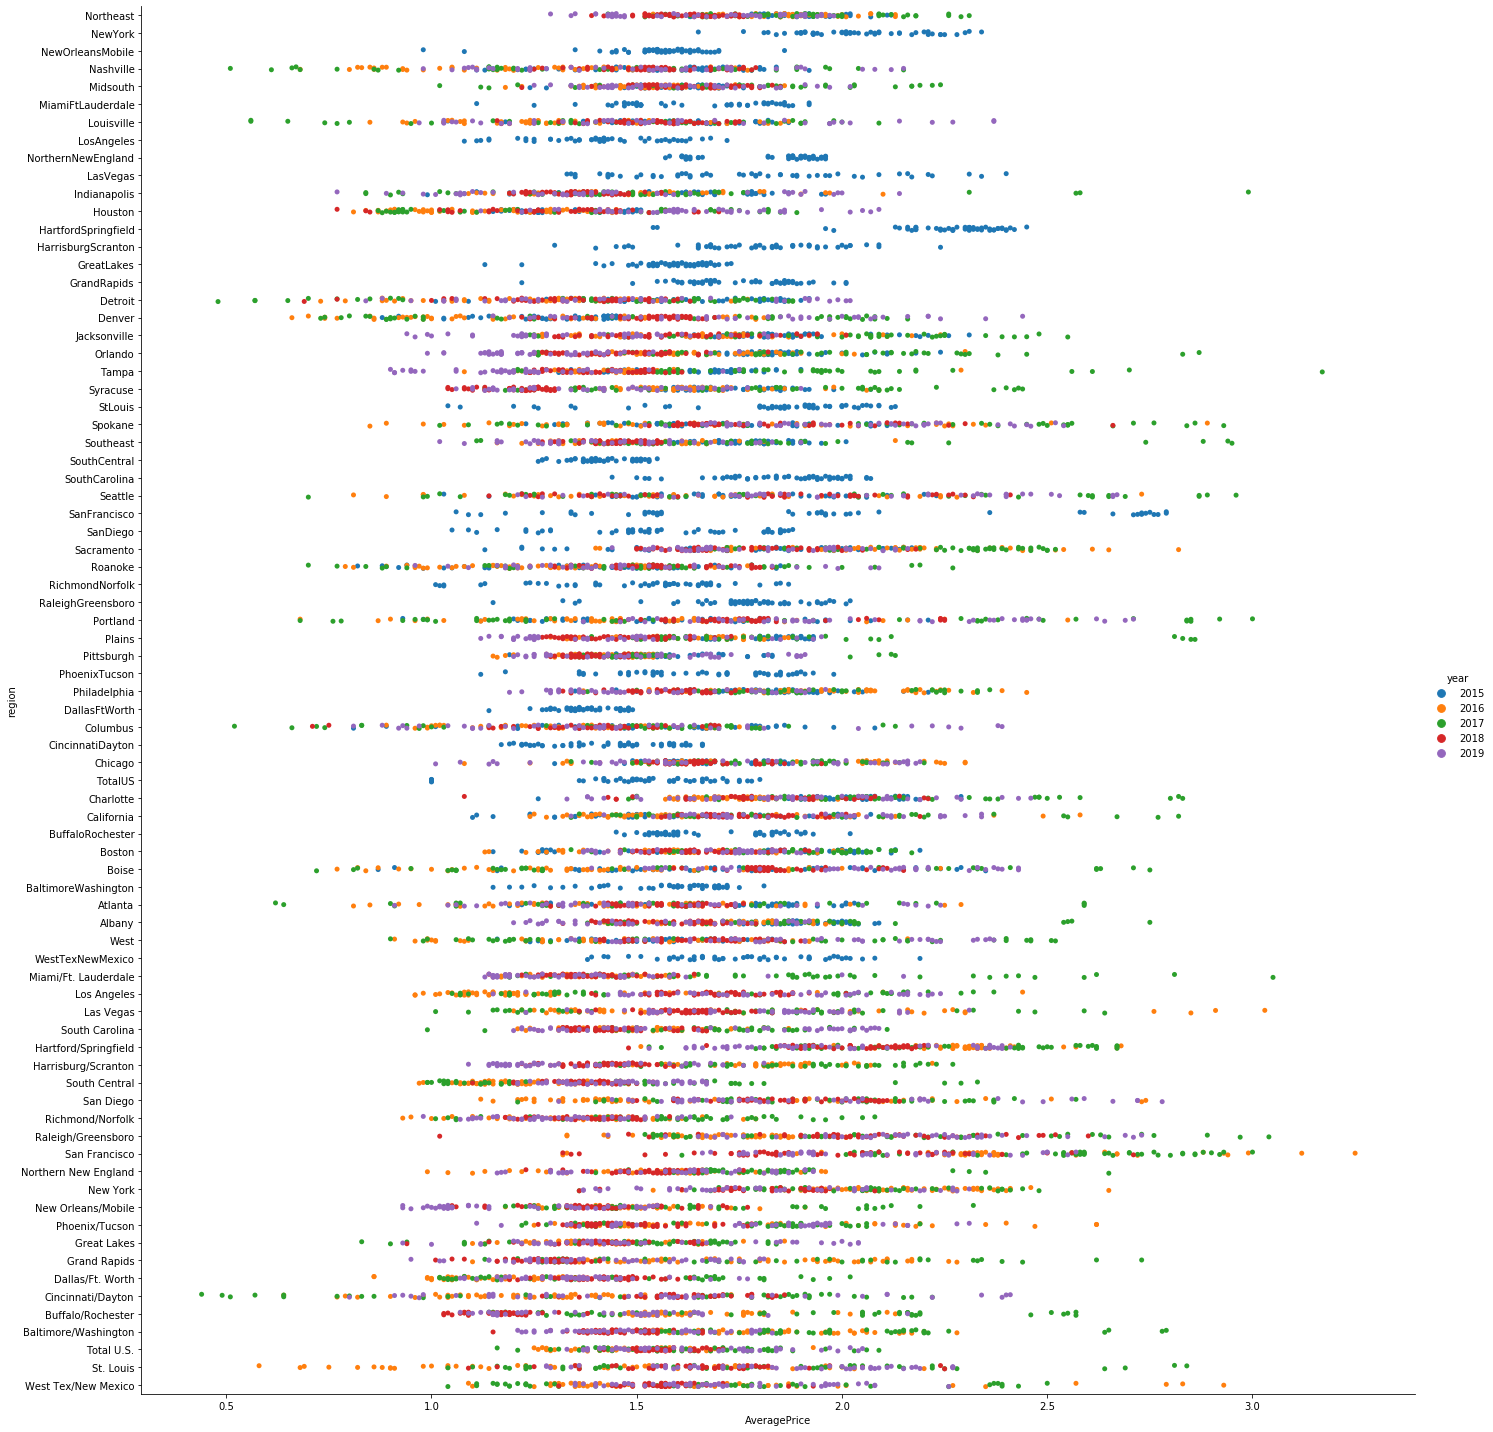

In [21]:
organic=sns.catplot('AveragePrice','region' ,data=df[df['type']=='organic'], hue='year',height=20)

In [43]:
avocado_df=df[['Date', 'AveragePrice']]

In [42]:
avocado_df

,Date,AveragePrice
0,2015-01-04,1.22
20999,2015-01-04,1.88
20947,2015-01-04,1.93
20895,2015-01-04,1.41
1771,2015-01-04,1.19
...,...,...
11332,2019-12-01,1.04
19175,2019-12-01,1.80
11533,2019-12-01,0.77
252,2019-12-01,1.15


In [44]:
avocado_df=avocado_df.rename(columns={'Date' : 'ds', 'AveragePrice' : 'y'})

In [45]:
avocado_df

,ds,y
0,2015-01-04,1.22
20999,2015-01-04,1.88
20947,2015-01-04,1.93
20895,2015-01-04,1.41
1771,2015-01-04,1.19
...,...,...
11332,2019-12-01,1.04
19175,2019-12-01,1.80
11533,2019-12-01,0.77
252,2019-12-01,1.15


In [46]:
m = Prophet()
m.fit(avocado_df)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [48]:
future = m.make_future_dataframe(periods=365)
forecast = m.predict(future)

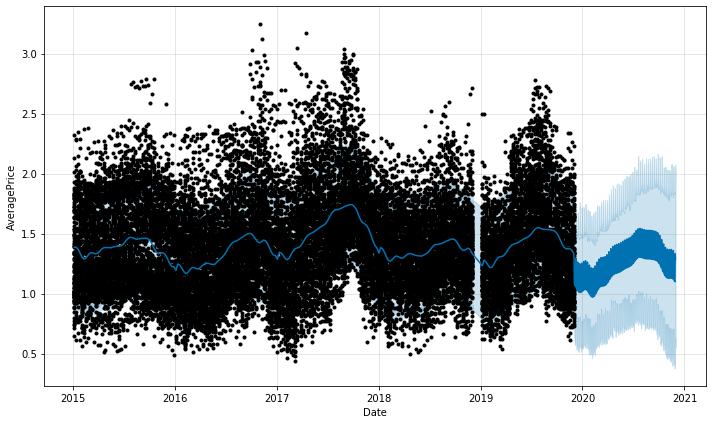

In [49]:
figure = m.plot(forecast, xlabel='Date', ylabel='AveragePrice')

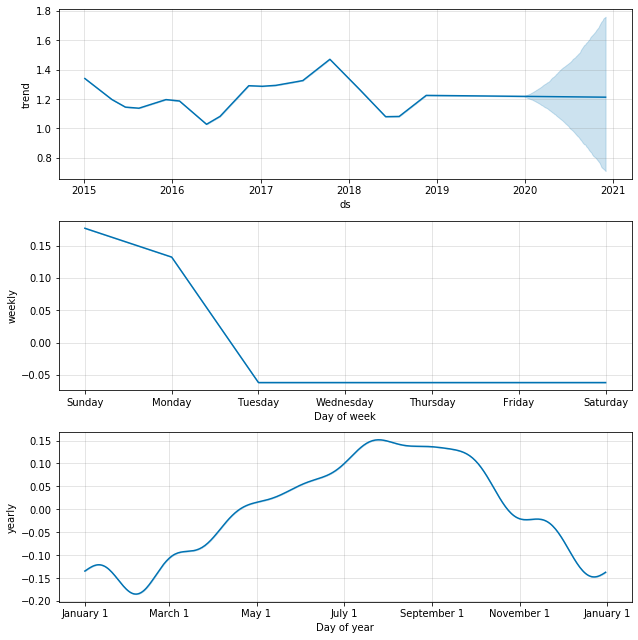

In [50]:
figure2 = m.plot_components(forecast)